# Image Classification
Given a dataset of handwritten number images, predict the number.

## Importing libraries 

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing datasets 

In [4]:
from tensorflow.keras.datasets import mnist

(x_train, y_train_unencoded), (x_test, y_test_unencoded) = mnist.load_data() # returns 2 tuples, so we HAVE to unpack this way

## Analysing Data 

In [5]:
print("Train features shape: ", x_train.shape)
print("Train labels shape: ", y_train_unencoded.shape)
print("Test features shape: ", x_test.shape)
print("Test labels shape: ", y_test_unencoded.shape)

Train features shape:  (60000, 28, 28)
Train labels shape:  (60000,)
Test features shape:  (10000, 28, 28)
Test labels shape:  (10000,)


### Visual examination

Label for first plot: 5
Label for second plot: 7


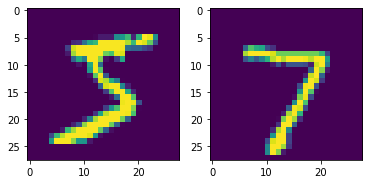

In [6]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(x_train[0])
print("Label for first plot:", y_train_unencoded[0])
axis[1].imshow(x_test[0])
print("Label for second plot:", y_test_unencoded[0])
plt.show()

In [7]:
print(set(y_train_unencoded))
print(set(y_test_unencoded))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


### One hot Encoding

In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train_unencoded)
y_test = to_categorical(y_test_unencoded)

print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Preprocessing

In [10]:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


###### Implementing 2 kinds of manipulation to compare the result

### Standardise the data

The pixel values range from 0 to 255. We standardise the data by dividing with 255.

In [11]:
x_train_stand = x_train_reshaped / 255
x_test_stand = x_test_reshaped / 255

In [12]:
print(set(x_train_stand[0]))

{0.0, 0.49411764705882355, 0.6862745098039216, 1.0, 0.4980392156862745, 0.9921568627450981, 0.06274509803921569, 0.5098039215686274, 0.611764705882353, 0.6274509803921569, 0.00392156862745098, 0.15294117647058825, 0.21568627450980393, 0.07058823529411765, 0.25098039215686274, 0.19215686274509805, 0.00784313725490196, 0.3137254901960784, 0.3058823529411765, 0.011764705882352941, 0.3686274509803922, 0.1411764705882353, 0.13725490196078433, 0.25882352941176473, 0.3215686274509804, 0.4470588235294118, 0.5215686274509804, 0.5294117647058824, 0.6705882352941176, 0.6745098039215687, 0.7333333333333333, 0.7176470588235294, 0.7450980392156863, 0.788235294117647, 0.8588235294117647, 0.8352941176470589, 0.09019607843137255, 0.8862745098039215, 0.8980392156862745, 0.9490196078431372, 0.9333333333333333, 0.9411764705882353, 0.9764705882352941, 0.984313725490196, 0.5333333333333333, 0.6509803921568628, 0.9686274509803922, 0.6666666666666666, 0.5450980392156862, 0.6039215686274509, 0.4666666666666667

### Normalise the data

In [13]:
x_mean = x_train_reshaped.mean()
x_std = x_train_reshaped.std()
print(x_mean)
print(x_std)

33.318421449829934
78.56748998339798


In [14]:
epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean) / x_std
x_test_norm = (x_test_reshaped - x_mean) / x_std

In [15]:
print(set(x_train_norm[0]))

{-0.3858901621553201, 1.3069219669849146, 1.1796428595307615, 1.8033104860561113, 1.6887592893473735, 2.821543345689335, 2.7197200597260127, 1.192370770276177, 1.53602436040239, 1.7396709323290347, 2.7960875241985046, 2.6560805059989363, 2.18514780841857, 2.4906176663085375, -0.10587612575618353, 2.681536327489767, 0.03413089244338476, -0.19497150097409063, 0.7723497156774721, 0.9378125553678709, -0.2458831439557518, 2.210603629909401, 1.9051337720194337, 1.2687382347486686, 1.7651267538198654, -0.424073894391566, 0.41596821480584373, -0.2840668761919977, 0.27596119660627544, 1.4596568959298981, 1.2941940562394993, 2.096052433200663, 1.9560454150010949, 2.7579037919622587, 1.4851127174207288, -0.09314821501076823, 2.783359613453089, 2.286971094381893, 2.4524339340722916, 1.3451056992211605, -0.042236572029107036, 2.643352595253521, -0.13133194724701414, 0.7596218049320568, 0.28868910735169073, 0.6068868759870732, 0.6196147867324885, -0.4113459836461507, 0.46687985778750496, 0.950540466

## Creating the model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Model with 2 hidden layers, both having 128 units and using ReLU activation. Output layer having 10 units (one hot encoding) and using softmax activation. Loss function is Categorical cross entropy, optimizer is Sochastic Gradient Descent and we set the metric for evaulation as accuracy of the model.

### Model with normalisation data

In [17]:
model_norm = Sequential([
    Dense(128, activation="relu", input_shape=(784, )),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

In [18]:
model_norm.compile(optimizer='sgd', metrics=['accuracy'], loss='categorical_crossentropy')

model_norm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_norm.fit(x_train_norm, y_train, epochs=4)

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3684 - accuracy: 0.8921
Epoch 2/4
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1831 - accuracy: 0.9467
Epoch 3/4
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1386 - accuracy: 0.9596
Epoch 4/4
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1119 - accuracy: 0.9669


#### Evaluating model

In [20]:
loss, accuracy = model_norm.evaluate(x_test_norm, y_test)
print("Accuracy of prediction of model with normalisation:", accuracy * 100)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.1086 - accuracy: 0.9672
Accuracy of prediction of model with normalisation: 96.7199981212616


#### Making Predictions

In [21]:
preds = model_norm.predict(x_test_norm)

#### Plotting the predictions
We create a 5x5 plot to plot 25 inputs and set the prediction with maximum probability as our output. Then, using red as incorrect prediction indicator and green as correct prediction indicator, we set that as xlabel.

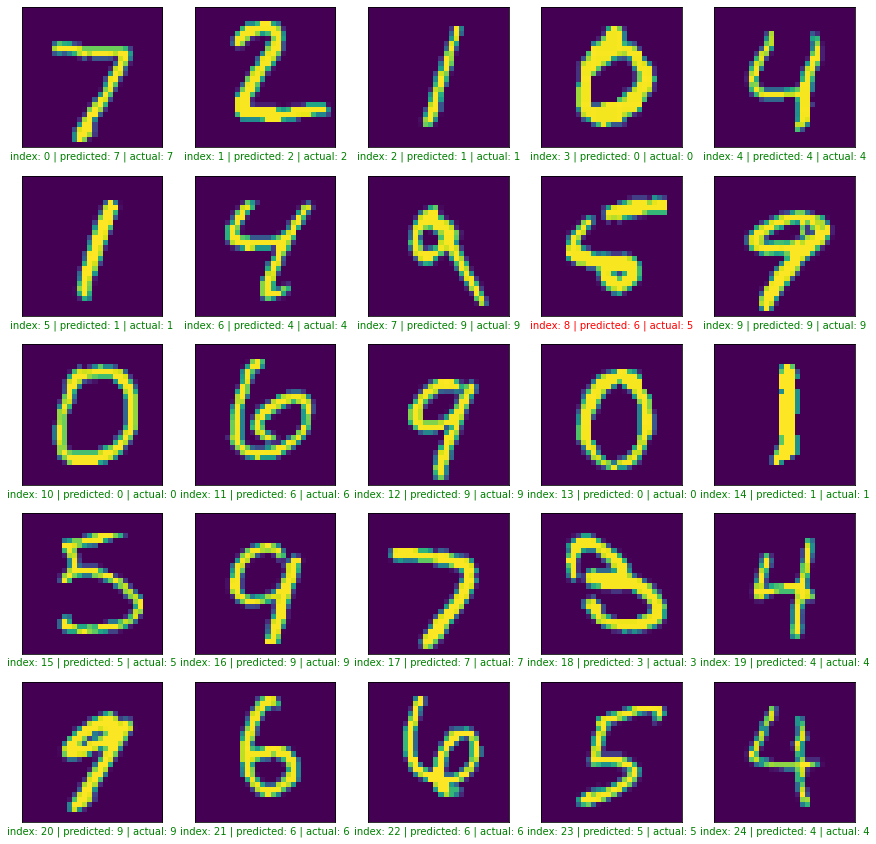

In [22]:
start = 0
plt.figure(figsize=(15, 15))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start + i])
    gt = np.argmax(y_test[start + i])
    colour = 'g'
    if pred != gt:
        colour = 'r'
    plt.imshow(x_test[start + i])
    plt.xlabel('index: {} | predicted: {} | actual: {}'.format(start + i, pred, gt), color=colour)
plt.show()

#### Plotting the wrong output
We see that the input number 8 is wrong. So we plot the model's predictions for each number and see that as the number is supposed to be 5 but it is written very similar to 6, the model shows highest peak as 6 but also has some value at 5

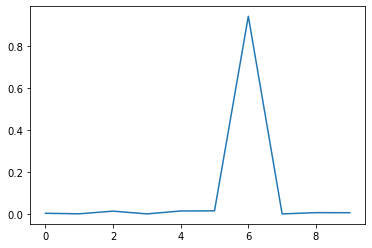

In [23]:
plt.plot(preds[8])
plt.show()

### Model with Standardisation data
To distinguish the variables of this model from above model, they are suffixed with '_s'

In [24]:
model_s = Sequential([
    Dense(128, activation="relu", input_shape=(784, )),
    Dense(128, activation="relu"),
    Dense(10, activation="sigmoid")
])

In [25]:
model_s.compile(optimizer='sgd', metrics=['accuracy'], loss="categorical_crossentropy")

model_s.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_s.fit(x_train_stand, y_train, epochs=4)

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 2s 40us/sample - loss: 0.9129 - accuracy: 0.7342
Epoch 2/4
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3221 - accuracy: 0.9085
Epoch 3/4
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2669 - accuracy: 0.9238
Epoch 4/4
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2297 - accuracy: 0.9346


#### Evaluating the model

In [27]:
loss_s, accuracy_s = model_s.evaluate(x_test_stand, y_test)
print("Accuracy of prediction of model with standardisation:", accuracy * 100)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.2080 - accuracy: 0.9404
Accuracy of prediction of model with standardisation: 96.7199981212616


#### Making predictions

In [28]:
preds_s = model_s.predict(x_test_stand)

#### Plotting the predictions

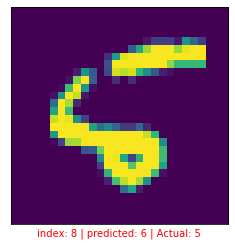

In [29]:
pred_s = np.argmax(preds_s[8])
actual_s = np.argmax(y_test[8])
plt.xticks([])
plt.yticks([])
plt.xlabel('index: 8 | predicted: {} | Actual: {}'.format(pred_s, actual_s), color='r')
plt.imshow(x_test[8])
plt.show()

#### Plotting the wrong output

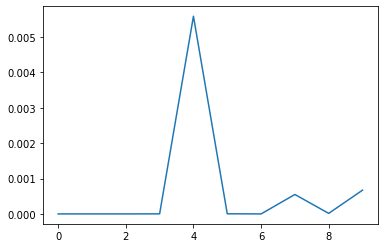

In [30]:
index_s = 124
plt.plot(preds_s[index_s])
plt.show()

TypeError: Image data of dtype <U15 cannot be converted to float

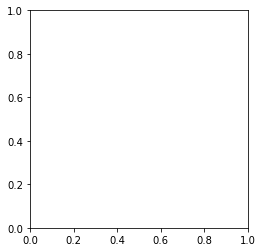

In [32]:
plt.imshow('im')